<a href="https://colab.research.google.com/github/alortiz05/DDDS-Cohort-16-Projects/blob/main/AOrtiz_p5_NLP_Description_for_Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing



This project will give you practical experience using Natural Language Processing techniques. This project is in three parts:
- in part 1) you will use a dataset in a CSV file
- in part 2) you will use the Wikipedia API to directly access content
on Wikipedia.
- in part 3) you will make your notebook interactive


### Part 1)



- The CSV file is available at https://ddc-datascience.s3.amazonaws.com/Projects/Project.5-NLP/Data/NLP.csv
- The file contains a list of famous people and a brief overview.
- The goal of part 1) is to ...
  1. Pick one person from the list ( the target person ) and output 10 other people who's overview are "closest" to the target person in a Natural Language Processing sense
  1. Also output the sentiment of the overview of the target person



####Imports

In [36]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random
from random import randint
from textblob import TextBlob
import nltk
nltk.download('punkt_tab')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


####Data Location

In [37]:
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.5-NLP/Data/NLP.csv"
p5 = pd.read_csv( url, header=None)
p5.head()

,0,1,2
0,URI,name,text
1,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
2,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
3,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
4,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...


####Explore and Clean Text

In [38]:
p5.describe()

,0,1,2
count,42787,42787,42787
unique,42787,42786,42787
top,<http://dbpedia.org/resource/Kenneth_Thomas>,author),kenneth thomas born february 24 1938 was chief...
freq,1,2,1


In [39]:
p5.shape

(42787, 3)

In [40]:
person= randint(0,42787)
print(person)

26247


In [41]:
p5.iloc[2626]

,2626
0,<http://dbpedia.org/resource/Annelie_Enochson>
1,Annelie Enochson
2,annelie enochson born october 29 1953 is a swe...


In [42]:
Annelie_Enochson = p5.iloc[2626,2]
Annelie_Enochson

'annelie enochson born october 29 1953 is a swedish christian democratic politician and architect she has been a member of the riksdag since 2000 in the riksdag she has been part of the former committee on housing 20002002 the committee on the labour market and the committee on european union affairs 20022006 she also served as a regular member of the oscedelegation between 20022006 and is now a deputy member after the election 2006 annelie is her partys spokeswoman in trafficrelated issues and a regular member of the committee on the transport and communications she also continues to serve in the oscedelegationthe political focus of annelie enochson is concentrated to three issues freedom of speech and religion in sweden and internationally compassion for the less fortunate and the local issues of gothenburg and its progresswith a background in gothenburg and the local development of the city enochson has several times by motions and interpellations pointed out the infrastructural jam

In [43]:

Annelie_Enochson_Clean = Annelie_Enochson.lower().replace("\n"," ").replace("\'s",'').replace('\'','')
Annelie_Enochson_Clean

'annelie enochson born october 29 1953 is a swedish christian democratic politician and architect she has been a member of the riksdag since 2000 in the riksdag she has been part of the former committee on housing 20002002 the committee on the labour market and the committee on european union affairs 20022006 she also served as a regular member of the oscedelegation between 20022006 and is now a deputy member after the election 2006 annelie is her partys spokeswoman in trafficrelated issues and a regular member of the committee on the transport and communications she also continues to serve in the oscedelegationthe political focus of annelie enochson is concentrated to three issues freedom of speech and religion in sweden and internationally compassion for the less fortunate and the local issues of gothenburg and its progresswith a background in gothenburg and the local development of the city enochson has several times by motions and interpellations pointed out the infrastructural jam

In [44]:
p5_text_clean = p5.iloc[:,2].str.lower().str.replace("\n"," ").str.replace("\'s",'').str.replace('\'','')
p5_text_clean

,2
0,text
1,digby morrell born 10 october 1979 is a former...
...,...
42785,tatiana faberg is an author and faberg scholar...
42786,kenneth thomas born february 24 1938 was chief...


In [45]:
tf_idf_matrix = TfidfVectorizer(stop_words = 'english')
tf_idf = tf_idf_matrix.fit_transform(p5_text_clean)


In [46]:
tf_idf.shape

(42787, 437190)

In [47]:
tf_idf_matrix = TfidfVectorizer(
    stop_words='english',
    max_features=1000  # Limit to top 1000 words
)
tf_idf = tf_idf_matrix.fit_transform(p5_text_clean)

In [48]:
pd.set_option('display.max_rows', 5)

results_df = pd.DataFrame.sparse.from_spmatrix(
    tf_idf,
    columns=tf_idf_matrix.get_feature_names_out()
)
results_df.transpose()




,0,1,2,3,4,5,6,7,8,9,...,42777,42778,42779,42780,42781,42782,42783,42784,42785,42786
10,0,0.062041,0,0,0,0,0,0.068541,0,0,...,0,0.056267,0,0,0,0,0,0.07372,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
youth,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.263613,0,0
zealand,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


####Nearest Neighbors

In [49]:
nn = NearestNeighbors().fit(tf_idf)

In [50]:
distances, indices = nn.kneighbors(
  X = tf_idf[0],
  n_neighbors = 10,
)


In [51]:
distances

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [52]:
indices

array([[    0,  4461, 25857, 42184,  9215, 21775, 24907, 19027, 35688,
        17222]])

In [53]:
np.array(p5_text_clean)[indices]

array([['text',
        'via tania is an australianborn chicagobased musician named tania bowers tania originally started performing in sydney during the 1990s with her sister kim bowers in noise outfit named spdfgh after relocating to chicago at the end of the 1990s tania set about piecing together an album as via tania with producer casey rice and various chicago musical luminaries her first release dream of was through seminal chicago record label chocolate industries in 2002 this was followed by a 12 vinyl release also through chocolate industries of lightning and thunder which was backed with a cover of new orders temptation in 2003 tania released her critically acclaimed fulllength album under a different sky the album featured artists like prefuse 73 casey rice tortoise howe gelb and tim kinsella pitchfork gave the album a glowing review and decreed via tania will be a major contender the album received coverage in cmj and venus zine and tania was featured on the cover of anthem

In [54]:
p5_text_clean.iloc[indices[0]]

,2
0,text
4461,via tania is an australianborn chicagobased mu...
...,...
35688,richard n foster managing partner millbrook ma...
17222,michael j l kirby oc born august 5 1941 is a c...


In [55]:
TextBlob(Annelie_Enochson_Clean).sentiment


Sentiment(polarity=0.10724637681159421, subjectivity=0.20379041248606466)

In [56]:
rows = [ 0,  4461, 25857, 42184,  9215, 21775, 24907, 19027, 35688,
        17222]  # example row indices
columns = [1]
ten_closest = p5.loc[rows, columns]
ten_closest

,1
0,name
4461,Via Tania
...,...
35688,Richard N. Foster
17222,Michael J. L. Kirby


In [57]:
ten_closest = ten_closest.drop(index=0).reset_index(drop=True)

In [58]:
ten_closest['Rank'] = range(1, len(ten_closest) + 1)

In [59]:
ten_closest

,1,Rank
0,Via Tania,1
1,Mary Beth Fielder,2
...,...,...
7,Richard N. Foster,8
8,Michael J. L. Kirby,9


In [60]:
ten_closest = ten_closest.rename(columns={
    1: 'Name'})
ten_closest

,Name,Rank
0,Via Tania,1
1,Mary Beth Fielder,2
...,...,...
7,Richard N. Foster,8
8,Michael J. L. Kirby,9


In [76]:
ten_closest.index.name = 'Original_Order'
ten_closest

,Name,Rank
Original_Order,,
0,Via Tania,1
1,Mary Beth Fielder,2
...,...,...
7,Richard N. Foster,8
8,Michael J. L. Kirby,9


### Part 2)



- For the same target person that you chose in Part 1), use the Wikipedia API to access the whole content of the target person's Wikipedia page.
- The goal of Part 2) is to ...
  1. Print out the text of the Wikipedia article for the target person
  1. Determine the sentiment of the text of the Wikipedia page for the target person
  1. Collect the text of the Wikipedia pages from the 10 nearest neighbors from Part 1)
  1. Determine the nearness ranking of these 10 people to your target person based on their entire Wikipedia page
  1. Compare, i.e. plot,  the nearest ranking from Step 1) with the Wikipedia page nearness ranking.  A difference of the rank is one means of comparison.



####Imports

In [61]:
%%capture
!pip3 install wikipedia-api

In [62]:
import wikipediaapi

####Target Wikipedia Article

In [63]:
topic = 'Annelie Enochson'
wikip = wikipediaapi.Wikipedia('foobar')
page_ex = wikip.page(topic)
wiki_textAE = page_ex.text
wiki_textAE

"Annelie Enochson (born 29 October 1953) is a Swedish Christian Democratic politician and architect. She has been a member of the Riksdag since 2000. In the Riksdag, she has been part of the former Committee on Housing (2000–2002), the Committee on the Labour Market and the Committee on European Union Affairs (2002–2006). She also served as a regular member of the OSCE-delegation between 2002–2006 and is now a deputy member. After the election 2006, Annelie is her party's spokeswoman in traffic-related issues and a regular member of the Committee on the Transport and Communications. She also continues to serve in the OSCE-delegation.\nThe political focus of Annelie Enochson is concentrated to three issues; freedom of speech and religion in Sweden and internationally, compassion for the less fortunate, and the local issues of Gothenburg and its progress.\nWith a background in Gothenburg and the local development of the city, Enochson has several times by motions and interpellations poin

In [64]:
wiki_textAE_Clean = wiki_textAE.lower().replace("\n"," ").replace("\'s",'').replace('\'','')
wiki_textAE_Clean

'annelie enochson (born 29 october 1953) is a swedish christian democratic politician and architect. she has been a member of the riksdag since 2000. in the riksdag, she has been part of the former committee on housing (2000–2002), the committee on the labour market and the committee on european union affairs (2002–2006). she also served as a regular member of the osce-delegation between 2002–2006 and is now a deputy member. after the election 2006, annelie is her party spokeswoman in traffic-related issues and a regular member of the committee on the transport and communications. she also continues to serve in the osce-delegation. the political focus of annelie enochson is concentrated to three issues; freedom of speech and religion in sweden and internationally, compassion for the less fortunate, and the local issues of gothenburg and its progress. with a background in gothenburg and the local development of the city, enochson has several times by motions and interpellations pointed 

####Target article Sentiment

In [65]:
wiki_textAE_blob = TextBlob(wiki_textAE_Clean)
wiki_textAE_blob.sentiment

Sentiment(polarity=0.03518518518518518, subjectivity=0.09002849002849003)

In [66]:
#ten_closest.to_list()
TenName_list = ten_closest['Name'].tolist()
TenName_list

['Via Tania',
 'Mary Beth Fielder',
 'Silvia Roederer',
 'Kendall Stewart',
 'Dave Roller',
 'Jeff Thacher',
 'Eric M. Witchey',
 'Richard N. Foster',
 'Michael J. L. Kirby']

In [67]:
all_wiki_texts = []
all_tf_idf = []

for name in TenName_list:
  topic = name
  wikip = wikipediaapi.Wikipedia('foobar')
  page_ex = wikip.page(topic)
  wiki_text = page_ex.text
  wiki_text_Clean = wiki_text.lower().replace("\n"," ").replace("\'s",'').replace('\'','')

  # Append cleaned text to list
  all_wiki_texts.append(wiki_text_Clean)

#wiki_text_blob = TextBlob(wiki_text_Clean)
tf_idf_matrix = TfidfVectorizer(stop_words = 'english')
tf_idf_all = tf_idf_matrix.fit_transform(all_wiki_texts)

# Store tf-idf for each name in a list
for i in range(len(TenName_list)):
    all_tf_idf.append(tf_idf_all[i])
#Fit Nearest Neighbors on the combined data
nn = NearestNeighbors().fit(tf_idf_all)

for i, name in enumerate(TenName_list):
  distances, indices = nn.kneighbors(
  X = all_tf_idf[i],
  n_neighbors = 9,
  )
print(distances)




[[0.         1.         1.38383295 1.39104483 1.39593052 1.40050233
  1.40061199 1.40115545 1.40477804]]


In [68]:
print(indices)

[[8 3 7 1 4 0 6 2 5]]


In [69]:
np.array(all_wiki_texts)[indices]

array([['michael j. l. kirby  (born august 5, 1941) is a canadian politician. he sat in the senate of canada as a liberal representing nova scotia. he is the former chair of the mental health commission of canada. born in montreal, kirby earned a bachelor of science and master of arts in mathematics from dalhousie university where he was a member of phi delta theta fraternity, and, also a doctor of philosophy in applied mathematics from northwestern university. in the 1960s kirby was a professor of business administration and public administration at dalhousie and also taught at the university of chicago and the university of kent. kirby worked as principal assistant to the premier of nova scotia gerald regan from 1970 to 1973 and  assistant principal secretary to prime minister pierre trudeau  from 1974 to 1976. he served as president of the institute for research on public policy from 1977 to 1980. kirby chaired the federal task force on atlantic fisheries which was established to re

In [70]:
# Convert the all_wiki_texts list into a Pandas DataFrame.
all_wiki_texts_df = pd.DataFrame({'wiki_text': all_wiki_texts})

# Now, you can use .loc to access elements using the indices:
ALLTen=all_wiki_texts_df.loc[indices[0]]
ALLTen.index.name = '1st_Order'
ALLTen

,wiki_text
1st_Order,
8,"michael j. l. kirby (born august 5, 1941) is ..."
3,
...,...
2,silvia roederer dma (usc) is a native of arge...
5,"jeffrey thomas thacher (born december 23, 1967..."


In [71]:
ALLTen['Rank2'] = range(1, len(all_wiki_texts_df) + 1)
print(ALLTen)

                                                   wiki_text  Rank2
1st_Order                                                          
8          michael j. l. kirby  (born august 5, 1941) is ...      1
3                                                                 2
...                                                      ...    ...
2          silvia roederer dma (usc)  is a native of arge...      8
5          jeffrey thomas thacher (born december 23, 1967...      9

[9 rows x 2 columns]


In [77]:
# Merge the two DataFrames based on rank columns
plot = pd.merge(ten_closest, ALLTen, left_on='Original_Order', right_on='1st_Order', how='left')
plot

,Name,Rank,wiki_text,Rank2
0,Via Tania,1,"tania may-bowers, better known by her stage na...",6
1,Mary Beth Fielder,2,"mary beth fielder is an american writer, direc...",4
...,...,...,...,...
7,Richard N. Foster,8,"richard n. foster, managing partner, millbrook...",3
8,Michael J. L. Kirby,9,"michael j. l. kirby (born august 5, 1941) is ...",1


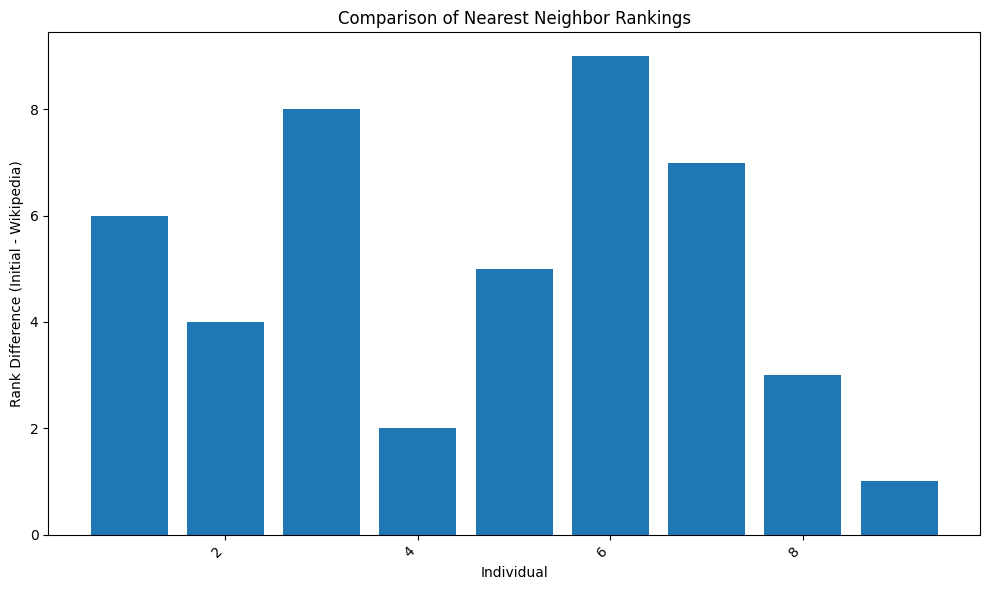

In [78]:

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(plot['Rank'], plot['Rank2'])
plt.xlabel("Initial - CSV")
plt.ylabel("Initial - Wikipedia")
plt.title("Comparison of Nearest Neighbor Rankings")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Part 3)


Make an interactive notebook where a user can choose or enter a name and the notebook displays the 10 closest individuals.

In addition to presenting the project slides, at the end of the presentation each student will demonstrate their code using a famous

1.   List item
2.   List item

person suggested by the other students that exists in the DBpedia set.


In [120]:
!curl -s https://ddc-datascience.s3.amazonaws.com/Projects/Project.5-NLP/Data/NLP.csv | wc -l

42786


In [122]:
def famous_person():
  url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.5-NLP/Data/NLP.csv"
  p5 = pd.read_csv( url, header=None,skiprows=1)
  person= input("Enter a famous person: ")

  #p5[...] — filters rows of the p5 DataFrame based on a condition.
  #p5[1] — selects column at index 1 (i.e., the second column).
  #.str.contains(person, case=False) — checks if the string in that column contains the value of person, case-insensitively.
  matches = p5[p5[1].str.contains(person, case=False)]

  # If no matches found, exit
  if matches.empty:
        print(f"No matches found for '{person}'.")
        return

 # Use the first match's index in the full DataFrame
  person_index = matches.index[0]

# Step 2: Clean all text descriptions (column 2)
  p5_p3_text_clean = p5[2].str.lower().str.replace("\n"," ").str.replace("\'s",'').str.replace('\'','')

  tf_idf_matrix = TfidfVectorizer(stop_words = 'english', max_features = 1000)
  tf_idf = tf_idf_matrix.fit_transform(p5_p3_text_clean)

  nn = NearestNeighbors().fit(tf_idf)
  distances, indices = nn.kneighbors(tf_idf[person_index])  # Limit n_neighbors to the size of choices)
  top_matches = p5.iloc[indices[0]]


  print(f"\nTop 10 similar people to '{p5.iloc[person_index, 1]}':\n")
  print(top_matches[[1, 2]].reset_index(drop=True))  # Show name and description

famous_person()

Enter a famous person: Richard N. Foster

Top 10 similar people to 'Richard N. Foster':

                               1  \
0              Richard N. Foster   
1                Robert D. Beyer   
2     %C3%81lvaro Gon%C3%A7alves   
3  Gast%C3%B3n Mansilla Yupanqui   
4                Donald Petersen   

                                                   2  
0  richard n foster managing partner millbrook ma...  
1  robert d beyer is an american investor and exe...  
2  lvaro l gonalves cofounded stratus group in 19...  
3  mr gastn gabriel mansilla yupanqui born in 199...  
4  donald eugene petersen born september 4 1926 i...  
